# Decision Tree Classifier

In this execise, I'd like you to build a decision tree. We will be using the same dataset as we did in our logistic regression.

This time, no explicit instructions, but here's the documentation for a Decision Tree Classifier in SKLearn:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Just like in the Logistic Regression, to simplify the dataset for this problem, I converted the `"Chance of Admit"` into a boolean `"Admitted"` column.

I've also done the train_test_split for you using sklearn's helpful helper function.

## Part 2 - Visualize

After you've built your model, try the following code to visualize it.

```python
# Plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()
```

Follow the path of the branches, what stands out to you?

## Part 3 - Change the Split Criterion and Try Pre-Pruning

Finally, try changing the parameters of your model:

```python
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
```

Get accuracy and visualize your new tree. Ask yourself would you want to use one of these models vs the other?

In [1]:
# 1. Load and clean the data
# I did this part for you!

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/datasets/admission_predict.csv')

df["Admitted"] = df["Chance of Admit "] > 0.75
df.drop("Chance of Admit ", axis=1, inplace=True)
df.rename(columns={"LOR ": "LOR"}, inplace=True)

df

Mounted at /content/gdrive


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,True
1,2,324,107,4,4.0,4.5,8.87,1,True
2,3,316,104,3,3.0,3.5,8.00,1,False
3,4,322,110,3,3.5,2.5,8.67,1,True
4,5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,True
396,397,325,107,3,3.0,3.5,9.11,1,True
397,398,330,116,4,5.0,4.5,9.45,1,True
398,399,312,103,3,3.5,4.0,8.78,0,False


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 2. Train/Test Split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

feature_columns = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]

df["Admitted"] = df["Admitted"].astype(bool)

# 3. Create X_train, y_train, X_test, y_test variables
X_train = df_train[feature_columns]
X_test = df_test[feature_columns]
y_train = df_train["Admitted"]
y_test = df_test["Admitted"]

# 4. Train the Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 5. Evaluate the Model (Report Accuracy as correct/all)
y_pred = model.predict(X_test)
df_test["Predicted Admitted"] = y_pred

true_positives = len(df_test[(df_test["Admitted"] == True) & (df_test["Predicted Admitted"] == True)])
true_negatives = len(df_test[(df_test["Admitted"] == False) & (df_test["Predicted Admitted"] == False)])
false_positives = len(df_test[(df_test["Admitted"] == False) & (df_test["Predicted Admitted"] == True)])
false_negatives = len(df_test[(df_test["Admitted"] == True) & (df_test["Predicted Admitted"] == False)])
accuracy = (true_positives + true_negatives) / len(df_test)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print(f"True Positives {true_positives}")
print(f"True Negatives {true_negatives}")
print(f"False Positives {false_positives}")
print(f"False Negatives {false_negatives}")
print(f"Accuracy is {accuracy * 100}%")
print(f"Precision: {precision * 100}%")
print(f"Recall: {recall * 100}%")

y_pred

True Positives 40
True Negatives 65
False Positives 10
False Negatives 5
Accuracy is 87.5%
Precision: 80.0%
Recall: 88.88888888888889%


array([False, False,  True,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False])

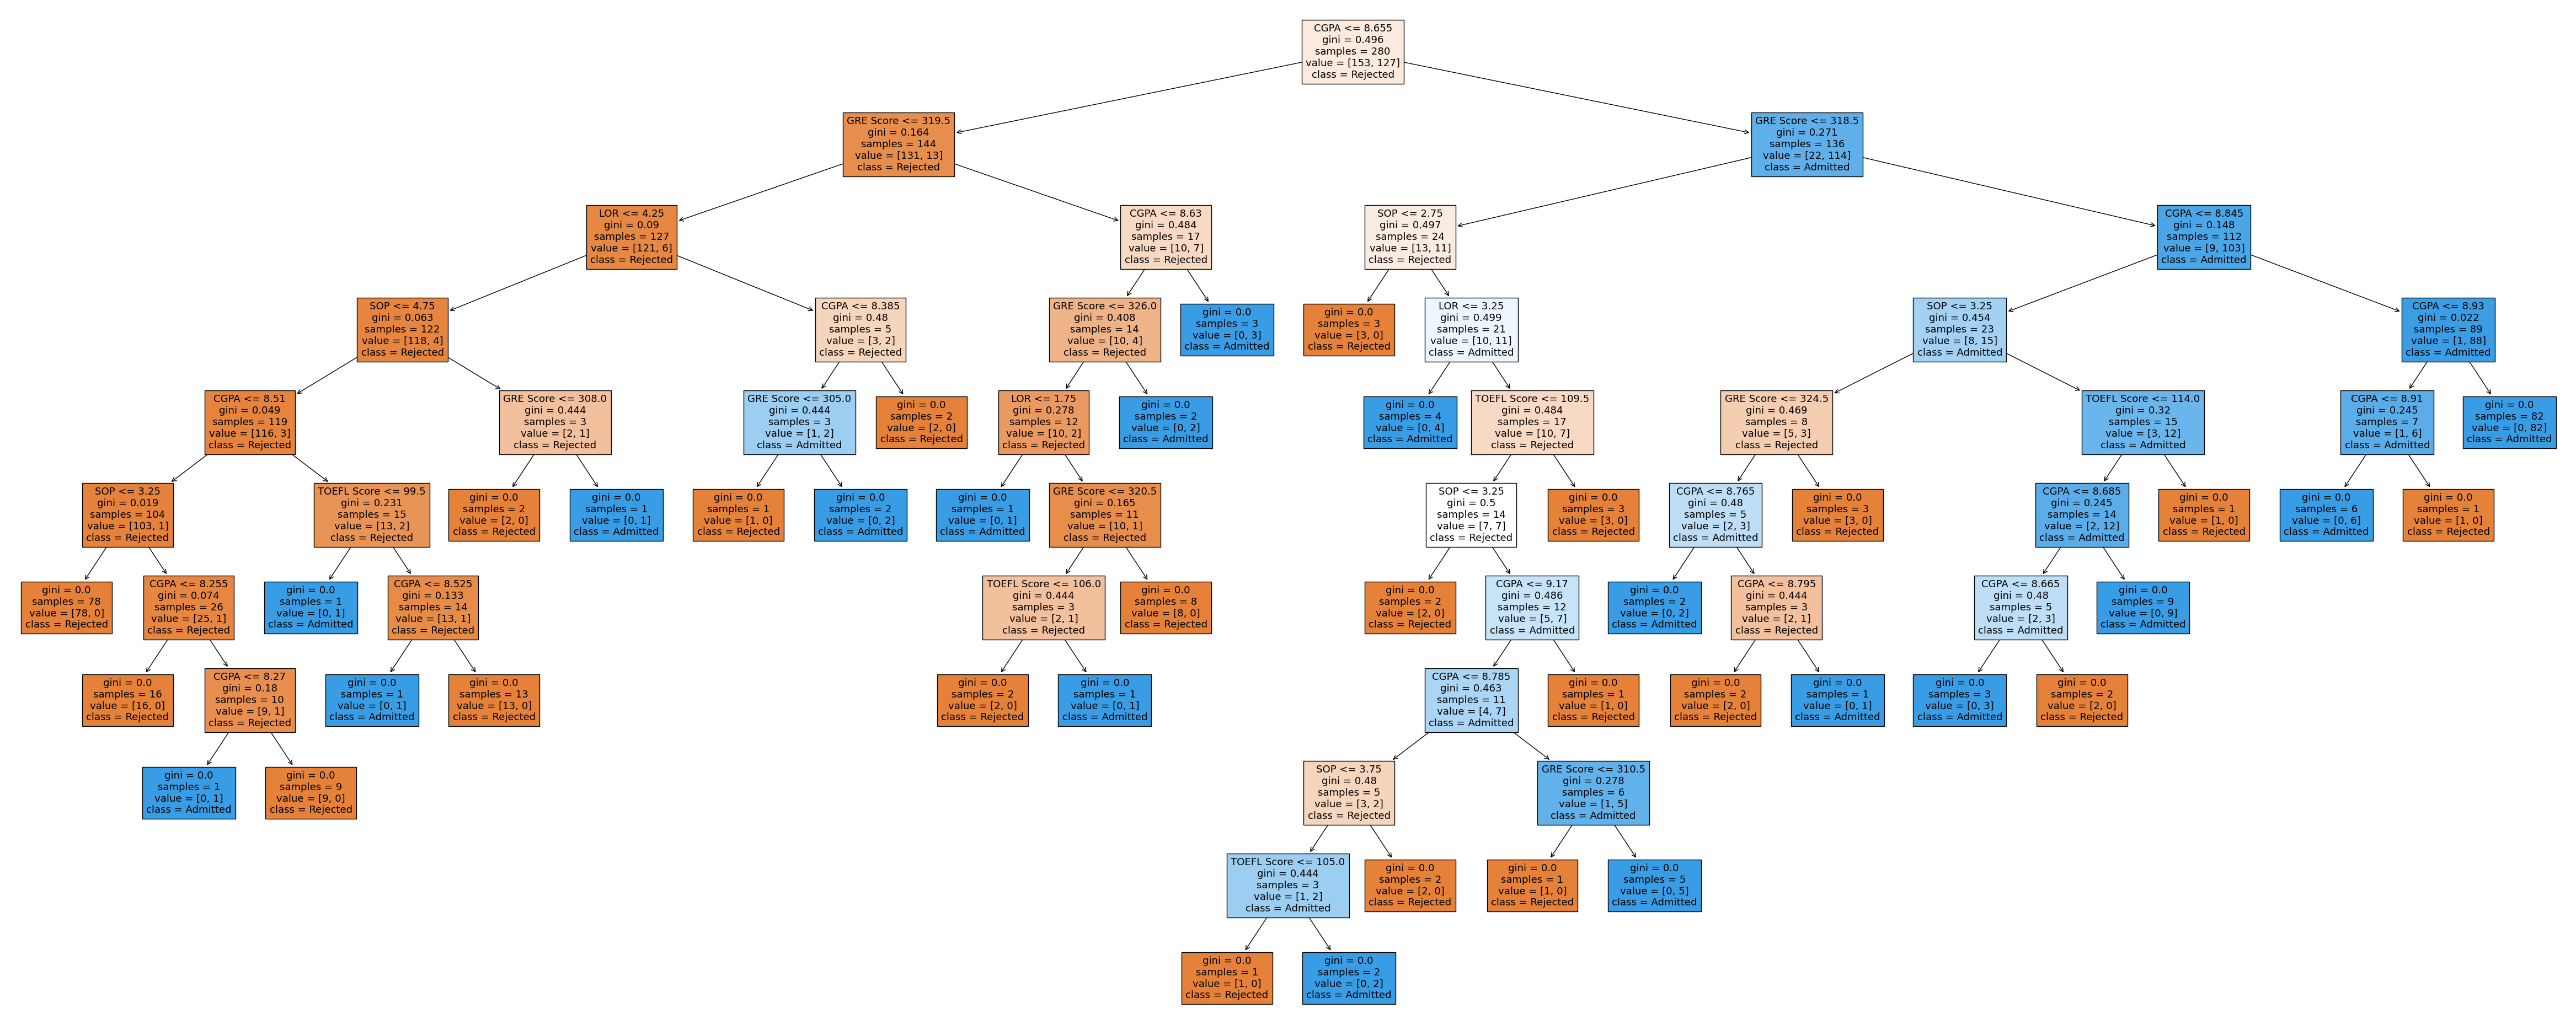

In [34]:
# Plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 24))
plot_tree(model, feature_names=X_train.columns, class_names=["Rejected", "Admitted"], filled=True)
plt.show()

In [25]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

tree_to_code(model, X_train.columns)

def tree(GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research):
  if CGPA <= 8.654999732971191:
    if GRE Score <= 319.5:
      if LOR <= 4.25:
        if SOP <= 4.75:
          if CGPA <= 8.510000228881836:
            return [[103.   1.]]
          else:  # if CGPA > 8.510000228881836
            return [[13.  2.]]
        else:  # if SOP > 4.75
          if GRE Score <= 308.0:
            return [[2. 0.]]
          else:  # if GRE Score > 308.0
            return [[0. 1.]]
      else:  # if LOR > 4.25
        if CGPA <= 8.385000228881836:
          if GRE Score <= 305.0:
            return [[1. 0.]]
          else:  # if GRE Score > 305.0
            return [[0. 2.]]
        else:  # if CGPA > 8.385000228881836
          return [[2. 0.]]
    else:  # if GRE Score > 319.5
      if CGPA <= 8.630000114440918:
        if GRE Score <= 326.0:
          if SOP <= 2.25:
            return [[0. 1.]]
          else:  # if SOP > 2.25
            return [[10.  1.]]
        else:

In [24]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,True
1,2,324,107,4,4.0,4.5,8.87,1,True
2,3,316,104,3,3.0,3.5,8.00,1,False
3,4,322,110,3,3.5,2.5,8.67,1,True
4,5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,True
396,397,325,107,3,3.0,3.5,9.11,1,True
397,398,330,116,4,5.0,4.5,9.45,1,True
398,399,312,103,3,3.5,4.0,8.78,0,False
